# Overview of Scenario
***
The following cells will detect fraudulent labels by using a selected image as a base target image.
The notebook will display images of labels that the deep learning one shot system selects as being fraudulent. Then the notebook will display images of labels that the system selects as being non-fradulent.

* First: Configure the deep learning model
* Second: Show which is the target label image
* Third: Show which images the fraud detection system selects as fraudulent
* Fourth: Show which images the fraud detection system selects as non-fraudulent

# Configure the deep learning model
***
This section of the notebook configures, and creates the deep learning model needed for the label fraud detection process.

In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from scipy.spatial import distance as dist
import cv2
from numpy.random import seed
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import numpy as np
import os
import glob
import json
import LabelValidationFunc as lf

Using TensorFlow backend.


In [2]:
labelImages_dir = "./TestData"

seed(200)
tf.compat.v1.random.set_random_seed(1000)

x = np.zeros((2, 224, 224, 3))
        
l2_reg = 0


# Target Image

The target image represents the company's copyrighted image that we will be used to determine as fraudulent images.  The target image is a registered trademark and all other images will be compared against it:

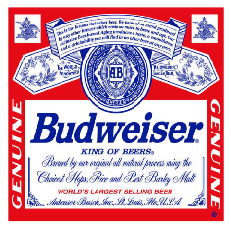

In [3]:
seed(200)
tf.compat.v1.random.set_random_seed(1000)

ConfigJson = {}
with open('FraudLabelConfig.json', 'r') as inpfile:
    ConfigJson = json.load(inpfile)
ModelName = ConfigJson['model_name']
#ImagePathName = labelImages_dir
ImagePathName = labelImages_dir + '/' + ConfigJson['target_directory'] + '/'
PercentThres = float(ConfigJson['scale_factor_for_threshold'])
#TargetImageFileName = labelImages_dir + ConfigJson['target_image_file_name']
TargetImageFileName = ImagePathName + ConfigJson['target_image_file_name']
target_image_file_name = TargetImageFileName
target_image= Image.open(TargetImageFileName)
subject02 = target_image.convert('RGB')
subj02 = subject02.resize((224, 224))
subj02_a = np.array(subj02)
plt.imshow(subj02_a)
plt.axis('off')
plt.show()

# Detected Fradulent Labels:
***
From the constructed dataset, the fraud detection system now will detect which labels are fraudulent.

shape = 262144
11.263333333333335
file_name = ./TestData/labelImages/Screen Shot 2019-12-14 at 8.33.14 AM.jpg
12.182399
file_name = ./TestData/labelImages/Screen Shot 2019-12-14 at 8.34.45 AM.jpg
18.620485
file_name = ./TestData/labelImages/Screen Shot 2019-12-15 at 8.37.31 AM.jpg
17.961578
file_name = ./TestData/labelImages/Screen Shot 2019-12-14 at 8.31.40 AM.jpg
14.546813
file_name = ./TestData/labelImages/Screen Shot 2019-12-14 at 8.35.30 AM.jpg
21.961988
file_name = ./TestData/labelImages/Screen Shot 2019-12-14 at 8.36.01 AM.jpg
14.462324
file_name = ./TestData/labelImages/test13.jpg
14.793977
file_name = ./TestData/labelImages/Screen Shot 2019-12-14 at 8.36.54 AM.jpg
17.755997
file_name = ./TestData/labelImages/Beer_Label_99.jpg
20.959213
file_name = ./TestData/labelImages/Lager_Label.jpg
14.450218
file_name = ./TestData/labelImages/Screen Shot 2019-12-14 at 8.36.33 AM.jpg
12.80467
file_name = ./TestData/labelImages/test6.jpg
19.36723
file_name = ./TestData/labelImages/Wine_Label

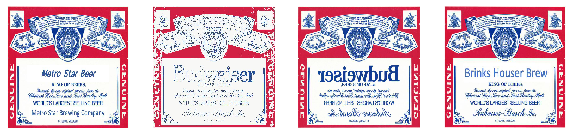

['./TestData/labelImages/Beer_Label_22.jpg', './TestData/labelImages/Bud_Label_LessColors.jpg', './TestData/labelImages/Bud_Label_hozFlip.jpg', './TestData/labelImages/Beer_Label_44.jpg']


In [4]:
mypath = ImagePathName + '/'
if('art' in ModelName):
    [lb_model, be_l, cor01, similar_diff, x_only] = lf.GenerateModelArt(TargetImageFileName, l2_reg, x)
    file_name_list = lf.DisplayFraudulentLabelsArt(mypath, PercentThres, lb_model, be_l, cor01, 
                                                similar_diff, TargetImageFileName, x_only, x)
    print(file_name_list)
else:
    [lb_model, be_l, num_bins, max_histo_level] = lf.GenerateModelLinear(TargetImageFileName,
                                                                        l2_reg, x)
    file_name_list = lf.DisplayFraudulentLabelsLinear(mypath, PercentThres, lb_model, be_l, 
                                                   num_bins, max_histo_level, 
                                                   TargetImageFileName, x)
    print(file_name_list)

# Detected Non-Fraudulent Labels:
***
From the constructed dataset, the fraud detection system now will detect which labels are non-fraudulent.

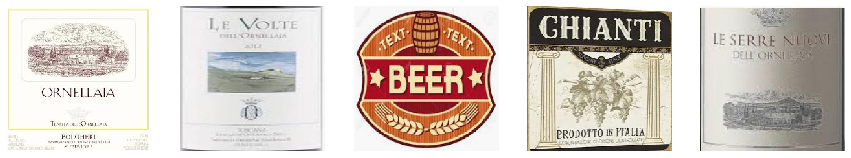

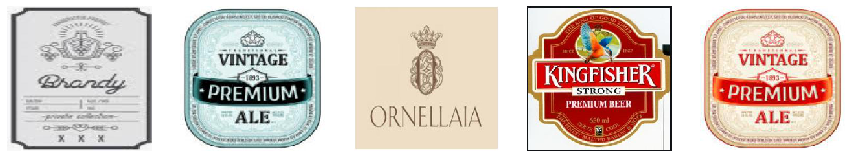

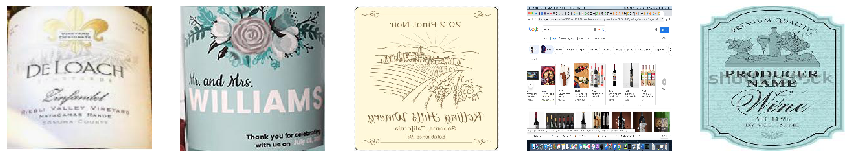

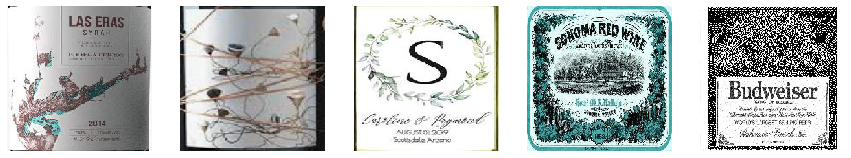

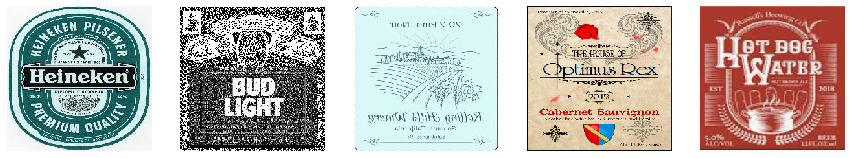

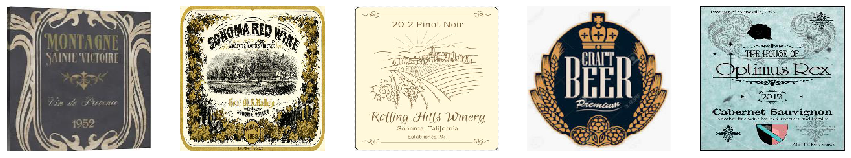

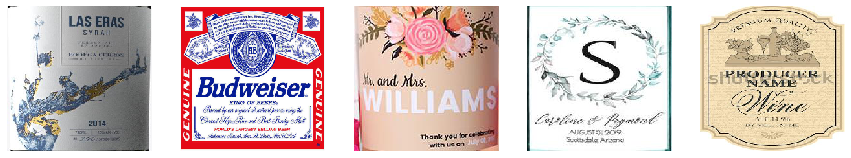

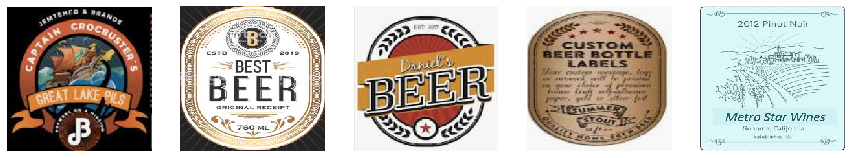

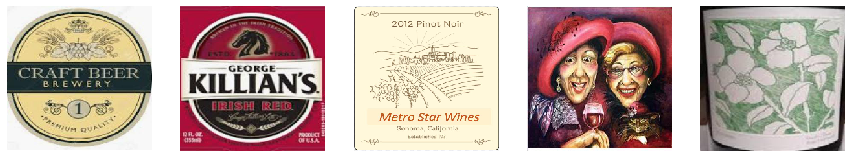

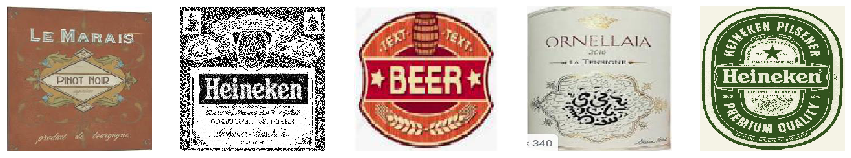

0


In [5]:
img_cnt = lf.DisplayNonFraudulentLabels(file_name_list, mypath)
print(img_cnt)